In [173]:
import pypsa, numpy as np
import os
import pandas as pd
import csv
import matplotlib.pyplot as plt
import highspy

Several Eastern Caribbean countries with only storage and no links, different numbers of months of hourly periods, with varying loads and generation from VRE 



In [174]:
#choose the working folders for reading in data and for saving output and figures
csv_folder_name =  "Eastern_CaribbeanExtendableStorage/"
network = pypsa.Network(csv_folder_name)
scenario = "Storage_6-hr_ATG-BRB-GLP-LCA-diesel_2x-geo-LCA-GRD_VRE-geo-must/"

INFO:pypsa.components:Applying weightings to all columns of `snapshot_weightings`
C:\Brecha\Lib\site-packages\pypsa\io.py:185: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

INFO:pypsa.io:Imported network Eastern_CaribbeanExtendableStorage has buses, carriers, generators, loads, storage_units


In [175]:
#specify use of linopy and solver of choice
network.optimize(solver_name="highs")


Index(['SaintKittsNevis', 'Antigua', 'Guadeloupe', 'Montserrat', 'Dominica',
       'Martinique', 'SaintLucia', 'Barbados', 'SaintVincentGrenadines',
       'Grenada'],
      dtype='object', name='Bus')
Index(['SaintKittsNevis', 'Antigua', 'Guadeloupe', 'Montserrat', 'Dominica',
       'Martinique', 'SaintLucia', 'Barbados', 'SaintVincentGrenadines',
       'Grenada'],
      dtype='object', name='Bus')
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 7/7 [00:02<00:00,  2.62it/s]
INFO:linopy.io: Writing time: 18.63s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 665809 primals, 1506814 duals
Objective: 5.93e+08
Solver model: available
Solver message: optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper, StorageUnit-ext-p_dispatch-lower

('ok', 'optimal')

In [176]:
#specify folder for saving results, plots
pypsa.Network.export_to_csv_folder(network,scenario)

INFO:pypsa.io:Exported network '<unnamed>' contains: storage_units, loads, carriers, generators, buses


<Axes: xlabel='snapshot'>

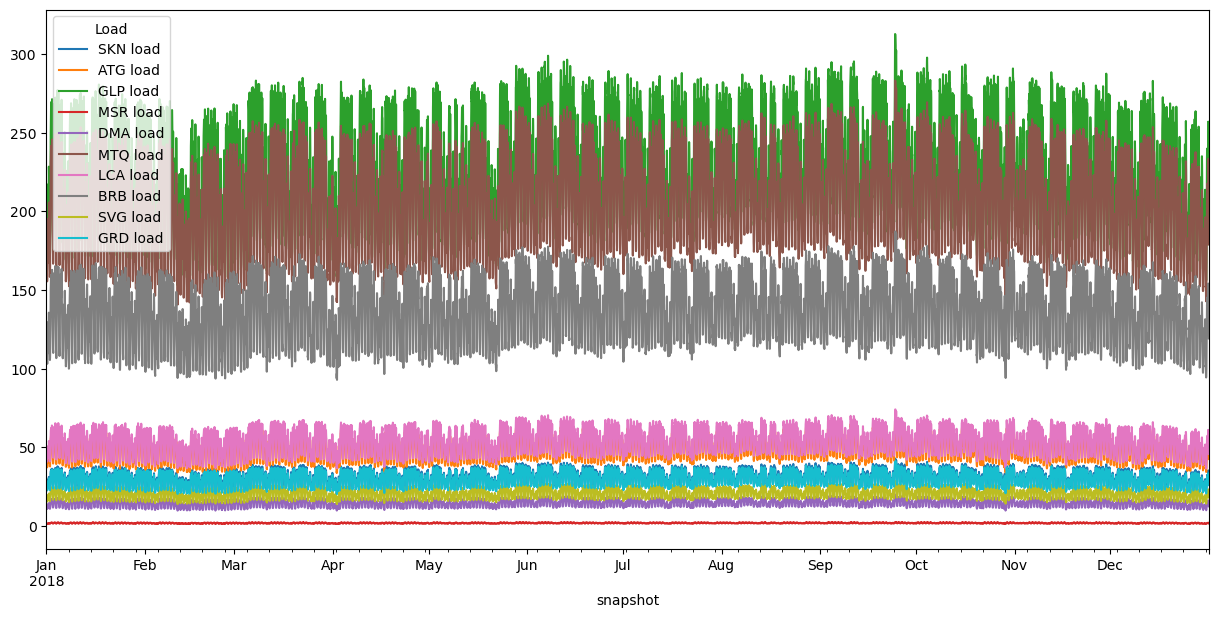

In [177]:
#print the load active power (P) consumption
network.loads_t.p.plot(figsize = (15,7))

<Axes: xlabel='snapshot'>

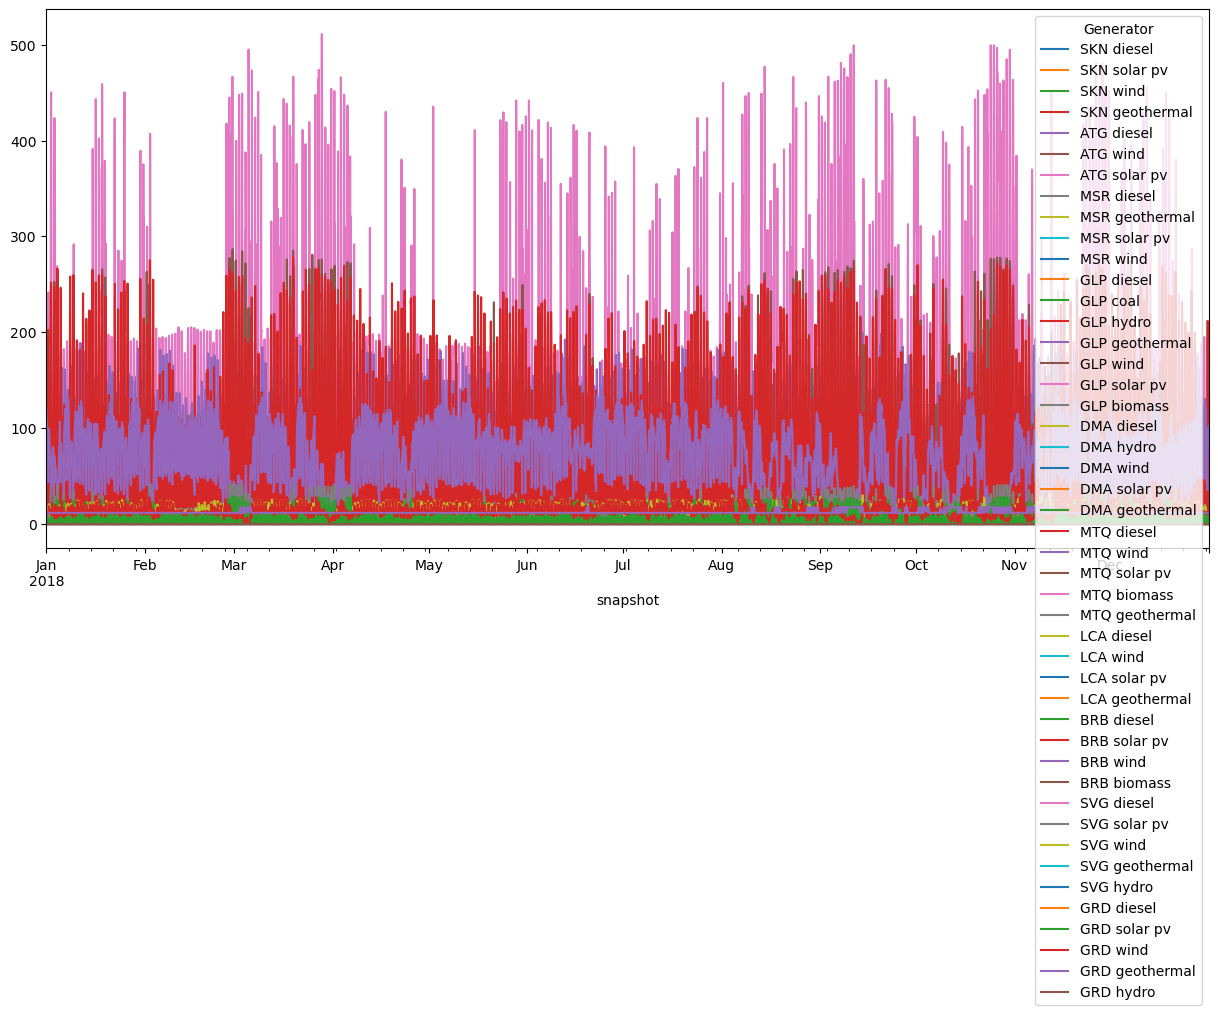

In [178]:
#print the generator active power (P) dispatch
network.generators_t.p.plot(figsize = (15,7))
#network.generators.p_nom_opt

In [179]:
#start manipulation of results for capacities
df_cap=pd.DataFrame(network.generators.p_nom_opt)
df_cap = df_cap.reset_index()
#df_cap

In [180]:
#reshape dataframe for output capacities
df_cap.columns = ['name','Capacity']
new = df_cap["name"].str.split(" ", n = 1, expand = True)
#new

In [181]:
df_cap["Technology"]= new[1]
df_cap['Country']= new[0]
#df_cap

In [182]:
df_cap.drop(columns =["name"], inplace = True)
df_cap= df_cap.pivot(index = 'Country',columns = 'Technology', values = 'Capacity')
df_cap

Technology,biomass,coal,diesel,geothermal,hydro,solar pv,wind
Country,,,,,,,
ATG,NaN,NaN,41.661797,NaN,NaN,89.240721,92.108883
BRB,-0.0,NaN,75.508919,NaN,NaN,354.358354,150.000000
DMA,NaN,NaN,0.000000,15.000000,6.6,-0.000000,-0.000000
GLP,10.0,-0.0,0.000000,138.117549,15.0,654.589329,168.954501
GRD,NaN,NaN,0.000000,19.343406,-0.0,36.885733,38.226805
LCA,NaN,NaN,0.000000,38.942455,NaN,109.547490,42.584144
MSR,NaN,NaN,0.000000,1.500000,NaN,4.866103,0.861501
MTQ,41.4,NaN,0.000000,108.459808,NaN,362.584084,239.890144
SKN,NaN,NaN,0.000000,27.051564,NaN,72.840369,7.922296


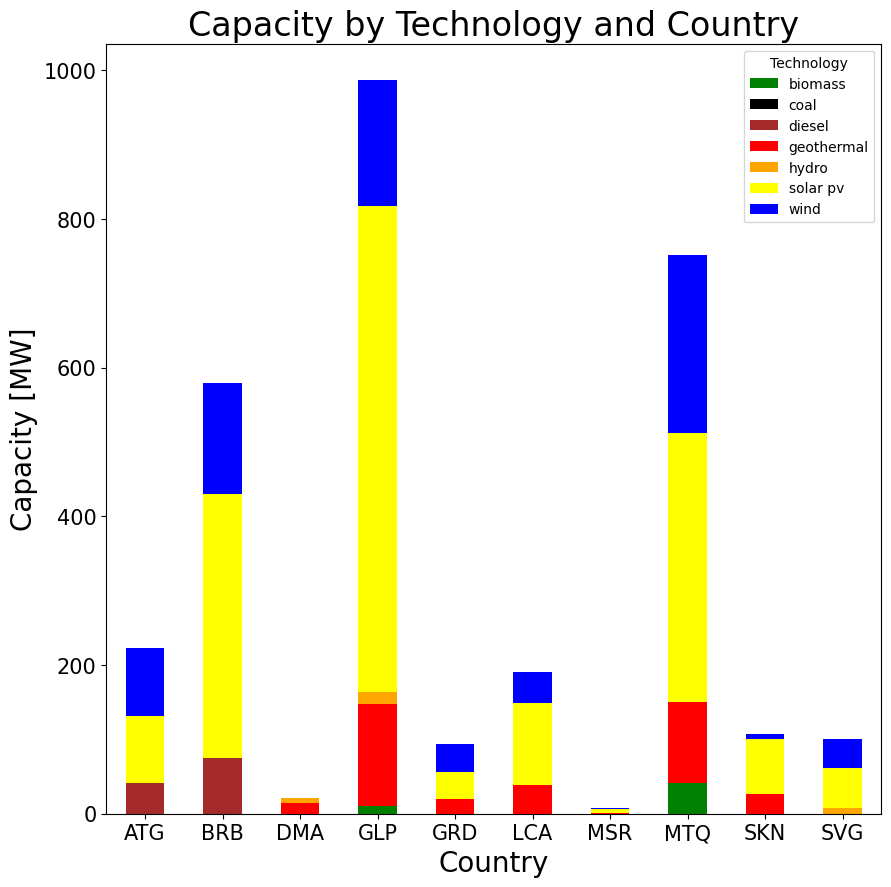

In [183]:
#plot capacities by country and technology
fig, axs = plt.subplots(figsize=(10, 10))        # Create an empty Matplotlib Figure and Axes
df_cap.plot(ax = axs,kind = 'bar', color=['green','black', 'brown', 'red', 'orange','yellow', 'blue'], rot=0,stacked = True)                  # Use pandas to put the area plot on the prepared Figure/Axes
axs.tick_params(axis='both', which='major', labelsize=15)
axs.set_title("Capacity by Technology and Country",fontsize=24)
axs.set_ylabel("Capacity [MW]",fontsize=20)          # Do any Matplotlib customization you like
axs.set_xlabel("Country",fontsize=20)
fig.savefig(scenario+"capacity.png", bbox_inches='tight')  

In [184]:
#scale capacities to the maximum for each country
df_cap_scaled = df_cap.div(df_cap.sum(axis=1), axis=0)*100
df_cap_scaled

Technology,biomass,coal,diesel,geothermal,hydro,solar pv,wind
Country,,,,,,,
ATG,NaN,NaN,18.681465,NaN,NaN,40.016215,41.302320
BRB,-0.000000,NaN,13.021759,NaN,NaN,61.110252,25.867989
DMA,NaN,NaN,0.000000,69.444444,30.555556,-0.000000,-0.000000
GLP,1.013519,-0.0,0.000000,13.998475,1.520278,66.343869,17.123859
GRD,NaN,NaN,0.000000,20.478760,-0.000000,39.050727,40.470513
LCA,NaN,NaN,0.000000,20.380814,NaN,57.332468,22.286718
MSR,NaN,NaN,0.000000,20.753767,NaN,67.326643,11.919590
MTQ,5.502875,NaN,0.000000,14.416443,NaN,48.194561,31.886121
SKN,NaN,NaN,0.000000,25.090903,NaN,67.560998,7.348099


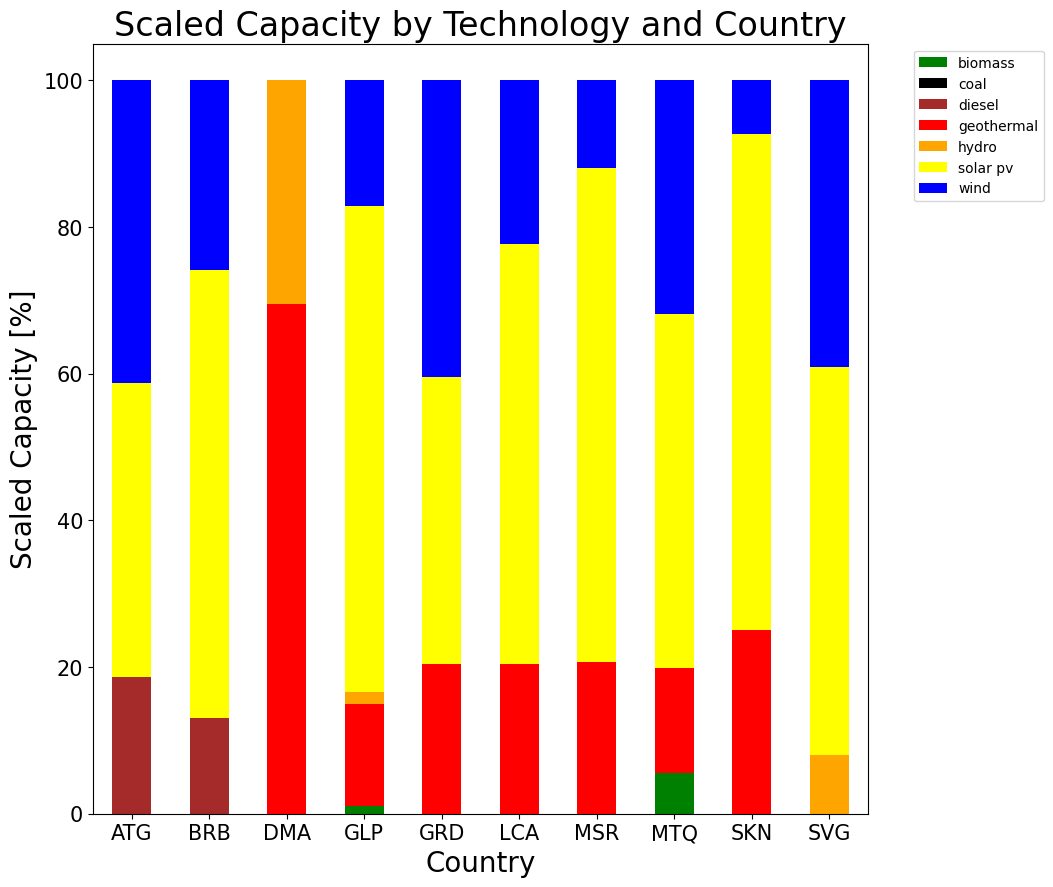

In [185]:
#plot the scaled capacities
fig, axs = plt.subplots(figsize=(10, 10))        # Create an empty Matplotlib Figure and Axes
df_cap_scaled.plot(ax = axs,kind = 'bar', color=['green','black', 'brown', 'red', 'orange','yellow', 'blue'], rot=0,stacked = True)                  # Use pandas to put the area plot on the prepared Figure/Axes
axs.tick_params(axis='both', which='major', labelsize=15)
axs.set_title("Scaled Capacity by Technology and Country",fontsize=24)
axs.set_ylabel("Scaled Capacity [%]",fontsize=20)          # Do any Matplotlib customization you like
axs.set_xlabel("Country",fontsize=20) 
axs.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
fig.savefig(scenario+"scaled_capacity.png", bbox_inches='tight')

In [186]:
#network.storage_units.p_nom_opt
network.storage_units.p_nom_opt

StorageUnit
ATG Storage     26.673997
BRB Storage    130.209322
DMA Storage     -0.000000
GLP Storage    320.000000
GRD Storage     45.000000
LCA Storage     75.000000
MSR Storage      2.306649
MTQ Storage    250.000000
SKN Storage     32.806589
SVG Storage     29.226647
Name: p_nom_opt, dtype: float64

In [187]:
#storage units energy capacity [MWh]
network.storage_units.p_nom_opt*network.storage_units.max_hours

StorageUnit
ATG Storage     160.043979
BRB Storage     781.255932
DMA Storage      -0.000000
GLP Storage    1920.000000
GRD Storage     270.000000
LCA Storage     450.000000
MSR Storage      13.839894
MTQ Storage    1500.000000
SKN Storage     196.839536
SVG Storage     175.359880
dtype: float64

In [188]:
#sum up generator costs by country and technology
#network.generators_t.p.sum()

In [189]:
(network.generators_t.p.sum()).sum()

6799810.610000001

In [190]:
#reshape dataframe for storage costs by country 
df_storage_cost = pd.DataFrame(network.storage_units.p_nom_opt*network.storage_units.capital_cost)
df_storage_cost.columns = ['storage_cost']
df_storage_cost = df_storage_cost.reset_index()
#df_storage_cost

In [191]:
#reshape storage costs dataframe
new = df_storage_cost["StorageUnit"].str.split(" ", n = 1, expand = True)


In [192]:
df_storage_cost["Tech"]= new[1]
df_storage_cost['Country']= new[0]
#df_storage_cost

In [193]:
df_storage_cost.drop(columns =["StorageUnit"], inplace = True)
df_storage_cost= df_storage_cost.pivot(index = 'Country',columns = 'Tech', values = 'storage_cost')
df_storage_cost

Tech,Storage
Country,
ATG,2.406341e+06
BRB,1.174657e+07
DMA,-0.000000e+00
GLP,2.886816e+07
GRD,4.059585e+06
LCA,6.765975e+06
MSR,2.080897e+05
MTQ,2.255325e+07
SKN,2.959581e+06


In [194]:
#reshape dataframe for generator costs 
df_cost=pd.DataFrame((network.generators.p_nom_opt*network.generators.capital_cost)+(network.generators_t.p.sum()*network.generators.marginal_cost))
df_cost.columns = ['generator_cost']
df_cost = df_cost.reset_index()
#df_cost

In [195]:
#reshape dataframe for generator and storage costs
new1 = df_cost["Generator"].str.split(" ", n = 1, expand = True)
df_cost["Technology"]= new1[1]
df_cost['Country']= new1[0]
df_cost.drop(columns =["Generator"], inplace = True)
df_cost = df_cost.pivot(index = 'Country',columns = 'Technology', values = 'generator_cost')
#extracted_col = pd.DataFrame(df_storage_cost['storage_cost'])
#extracted_col
df_cost = df_cost.join(df_storage_cost['Storage'])
df_cost

,biomass,coal,diesel,geothermal,hydro,solar pv,wind,Storage
Country,,,,,,,,
ATG,NaN,NaN,1.504769e+07,NaN,NaN,6.871536e+06,7.921364e+06,2.406341e+06
BRB,0.000000e+00,NaN,3.007399e+07,NaN,NaN,2.728559e+07,1.290000e+07,1.174657e+07
DMA,NaN,NaN,0.000000e+00,1.274724e+07,1.477037e+06,0.000000e+00,0.000000e+00,-0.000000e+00
GLP,3.615191e+06,0.0,0.000000e+00,1.168164e+08,2.395912e+06,5.040338e+07,1.453009e+07,2.886816e+07
GRD,NaN,NaN,0.000000e+00,1.641996e+07,0.000000e+00,2.840201e+06,3.287505e+06,4.059585e+06
LCA,NaN,NaN,0.000000e+00,3.294041e+07,NaN,8.435157e+06,3.662236e+06,6.765975e+06
MSR,NaN,NaN,0.000000e+00,1.269799e+06,NaN,3.746899e+05,7.408906e+04,2.080897e+05
MTQ,1.551695e+07,NaN,0.000000e+00,9.207572e+07,NaN,2.791897e+07,2.063055e+07,2.255325e+07
SKN,NaN,NaN,0.000000e+00,2.294547e+07,NaN,5.608708e+06,6.813174e+05,2.959581e+06


In [196]:
#reshape dataframe for actual generation by country and technology (in GWh)
df_gen=pd.DataFrame(network.generators_t.p.sum()/1000)
df_gen = df_gen.reset_index()
df_gen.columns = ['name','Electricity']
new = df_gen["name"].str.split(" ", n = 1, expand = True)
df_gen["Technology"]= new[1]
df_gen['Country']= new[0]
df_gen.drop(columns =["name"], inplace = True)
df_gen= df_gen.pivot(index = 'Country',columns = 'Technology', values = 'Electricity')
df_gen

Technology,biomass,coal,diesel,geothermal,hydro,solar pv,wind
Country,,,,,,,
ATG,NaN,NaN,33.784961,NaN,NaN,101.033455,302.197624
BRB,0.000000,NaN,75.238556,NaN,NaN,498.728467,627.955077
DMA,NaN,NaN,0.000000,82.737200,44.743700,0.000000,0.000000
GLP,0.822792,0.0,0.000000,733.924700,5.591153,676.969557,585.861997
GRD,NaN,NaN,0.000000,105.775365,0.000000,40.495155,117.748181
LCA,NaN,NaN,0.000000,207.123104,NaN,113.462721,152.853575
MSR,NaN,NaN,0.000000,8.027444,NaN,5.373931,2.989144
MTQ,7.335341,NaN,0.000000,593.484536,NaN,382.824950,837.428474
SKN,NaN,NaN,0.000000,147.041802,NaN,96.052555,30.088493


In [197]:
#calculate LCOE
df_cost.sum(axis=1)/df_gen.sum(axis=1)/1000

Country
ATG     73.788895
BRB     68.229175
DMA    111.579703
GLP    108.143157
GRD    100.777890
LCA    109.420077
MSR    117.547680
MTQ     98.126442
SKN    117.851740
SVG     62.356621
dtype: float64

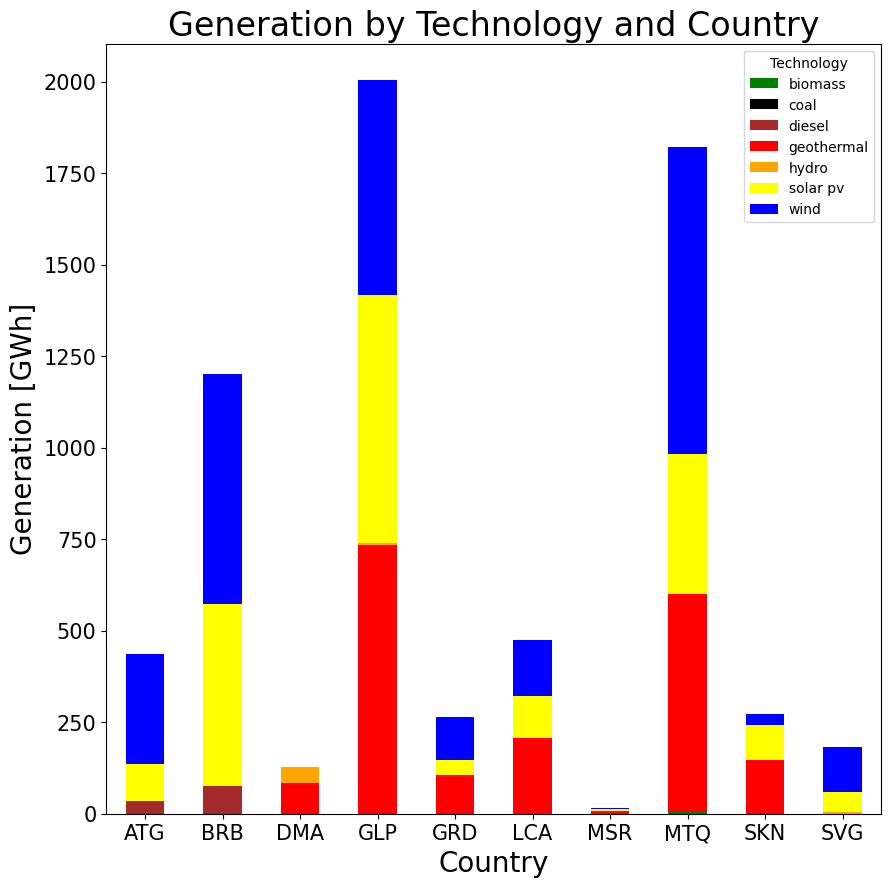

In [198]:
#plot generation (GWh) by technology and country; save output plot
fig, axs = plt.subplots(figsize=(10, 10))        # Create an empty Matplotlib Figure and Axes
df_gen.plot(ax = axs,kind = 'bar', color=['green','black', 'brown', 'red', 'orange','yellow', 'blue'], rot=0,stacked = True)                  # Use pandas to put the area plot on the prepared Figure/Axes
axs.tick_params(axis='both', which='major', labelsize=15)
axs.set_title("Generation by Technology and Country",fontsize=24)
axs.set_ylabel("Generation [GWh]",fontsize=20)          # Do any Matplotlib customization you like
axs.set_xlabel("Country",fontsize=20) 
fig.savefig(scenario+"generation.png", bbox_inches='tight') 

In [199]:
#scaled the generation output by country and technology
df_gen_scaled = df_gen.div(df_gen.sum(axis=1), axis=0)*100

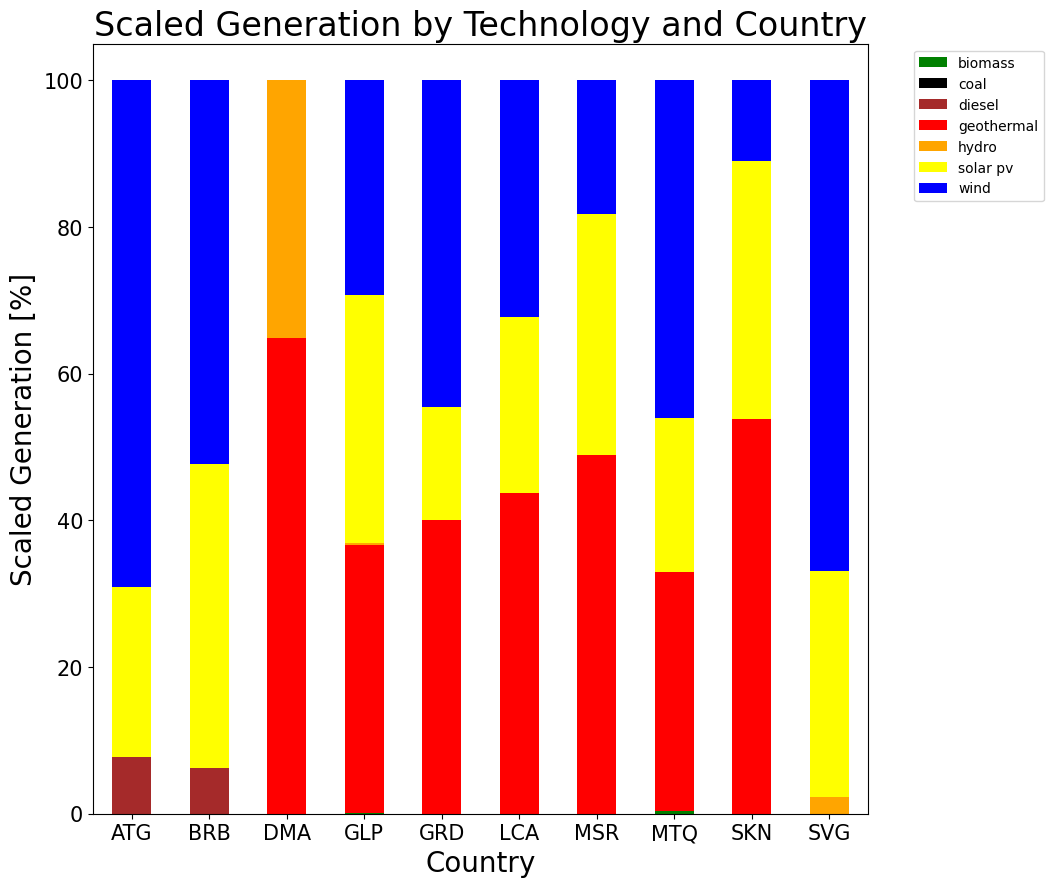

In [200]:
#plot the scaled output by technology and country
fig, axs = plt.subplots(figsize=(10, 10))        # Create an empty Matplotlib Figure and Axes
df_gen_scaled.plot(ax = axs,kind = 'bar', color=['green','black', 'brown', 'red', 'orange','yellow', 'blue'], rot=0,stacked = True)                  # Use pandas to put the area plot on the prepared Figure/Axes
axs.tick_params(axis='both', which='major', labelsize=15)
axs.set_title("Scaled Generation by Technology and Country",fontsize=24)
axs.set_ylabel("Scaled Generation [%]",fontsize=20)          # Do any Matplotlib customization you like
axs.set_xlabel("Country",fontsize=20) 
axs.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
fig.savefig(scenario+"scaled_generation.png", bbox_inches='tight') 

In [201]:
#calculate capacity factors
#network.generators_t.p.sum()/(network.generators.p_nom_opt*8760)

In [202]:
#calculate LCOE
((network.generators.p_nom_opt*network.generators.capital_cost).sum()+(network.generators_t.p.sum()*network.generators.marginal_cost).sum()+(network.storage_units.p_nom_opt*network.storage_units.capital_cost).sum()).sum()/(network.loads_t.p_set.sum()).sum()

95.25131434744789

In [203]:
((network.generators.p_nom_opt*network.generators.capital_cost).sum()+(network.generators_t.p.sum()*network.generators.marginal_cost).sum()+(network.storage_units.p_nom_opt*network.storage_units.capital_cost).sum())/network.loads_t.p_set.sum()

Load
SKN load     2370.906146
MSR load    39516.189719
ATG load     1482.075802
GLP load      323.332934
DMA load     5080.689718
MTQ load      355.664375
LCA load     1368.054492
SVG load     3556.462716
GRD load     2453.200845
BRB load      538.879265
dtype: float64

<Axes: xlabel='snapshot'>

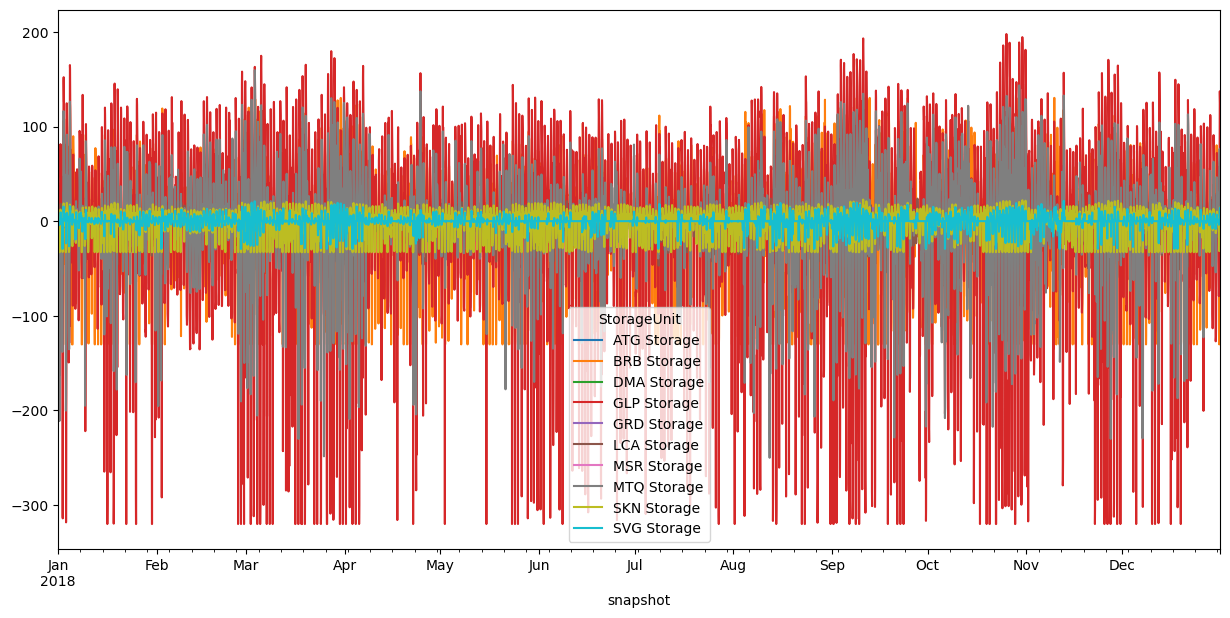

In [204]:
#print storage units
network.storage_units_t.p.plot(figsize = (15,7))
#network.stores_t.p.plot(figsize = (15,7))


<Axes: xlabel='snapshot'>

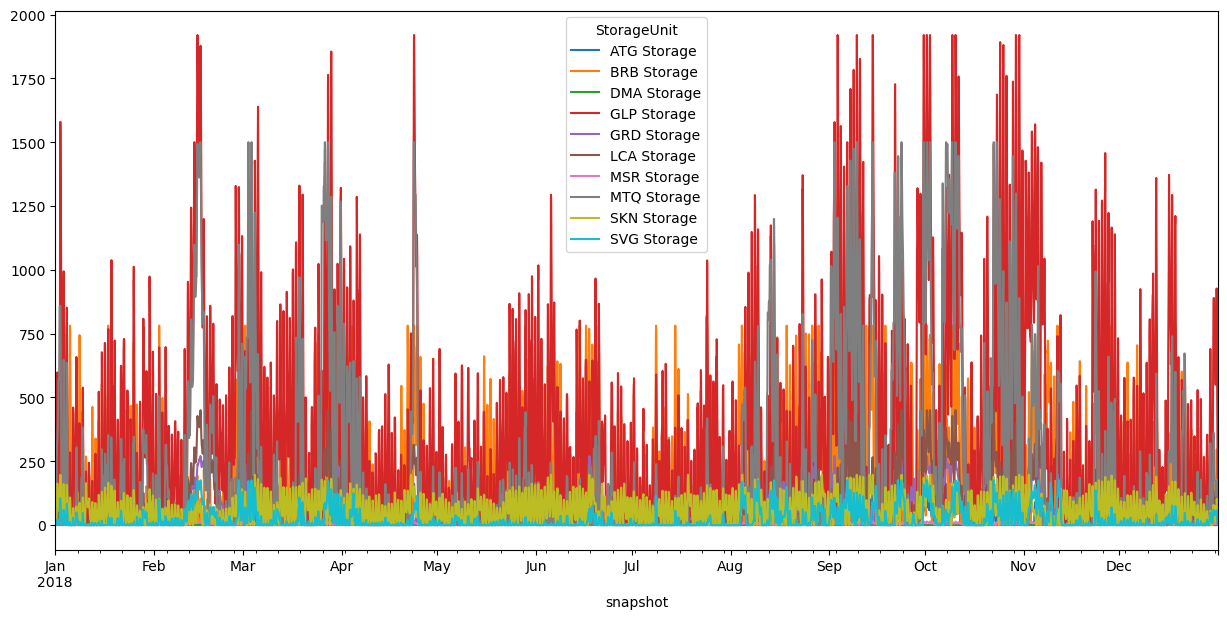

In [205]:
#print storage units state of charge
network.storage_units_t.state_of_charge.plot(figsize = (15,7))
#network.stores_t.e.plot(figsize = (15,7))
